In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

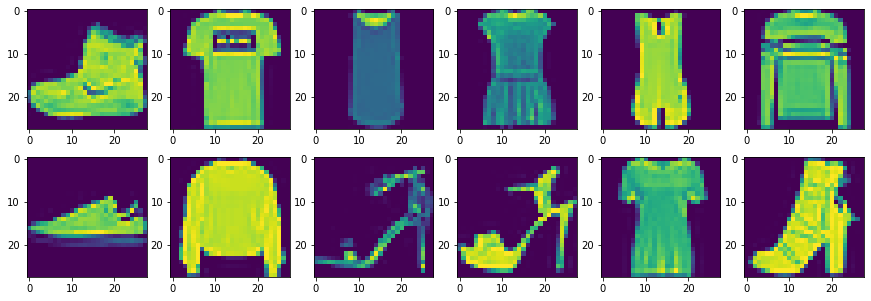

In [3]:
fig,axes = plt.subplots(nrows=2,ncols=6,figsize=(15,5))
ax=axes.ravel()
for i in range(12):
    ax[i].imshow(training_images[i].reshape(28,28))
plt.show() 

In [4]:
training_images = training_images/255.0
test_images = test_images/255.0

In [5]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(256,activation =tf.nn.relu),tf.keras.layers.Dense(10,activation =tf.nn.softmax)])

In [6]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [7]:
t1 = time()
model.fit(training_images,training_labels,epochs=10)
t2 = time()

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 509us/sample - loss: 0.4846 - accuracy: 0.8293
Epoch 2/10
60000/60000 [==============================] - 28s 474us/sample - loss: 0.3628 - accuracy: 0.8679
Epoch 3/10
60000/60000 [==============================] - 28s 474us/sample - loss: 0.3271 - accuracy: 0.8794
Epoch 4/10
60000/60000 [==============================] - 29s 477us/sample - loss: 0.3017 - accuracy: 0.8892
Epoch 5/10
60000/60000 [==============================] - 28s 467us/sample - loss: 0.2870 - accuracy: 0.8931
Epoch 6/10
60000/60000 [==============================] - 27s 445us/sample - loss: 0.2700 - accuracy: 0.8985
Epoch 7/10
60000/60000 [==============================] - 27s 454us/sample - loss: 0.2557 - accuracy: 0.9051
Epoch 8/10
60000/60000 [==============================] - 28s 467us/sample - loss: 0.2463 - accuracy: 0.9086
Epoch 9/10
60000/60000 [==============================] - 28s 459us/sample - loss: 0.2364 - accuracy: 0.9

In [8]:
print(f'training time{round(t2-t1)}')

training time289


In [9]:
test_loss=model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 3s 284us/sample - loss: 0.3393 - accuracy: 0.8815


In [10]:
print(f'Accuracy{test_loss[1]}')

Accuracy0.8815000057220459


In [11]:
model.summary(())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [12]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

t1=time()
model.fit(training_images, training_labels, epochs=5)
t2=time()
print("\nTraining wall clock time: {} seconds\n".format(round(t2-t1,3)))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy: ",test_acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)               